# Goalkeeper Comparison

## Introduction

Following the analysis of a recent article about Jan Oblak's clean sheets statistic that's received a lot of media coverage, I thought I'd research some of my suggested improvements. The article can be found below:

https://www.thesportsman.com/articles/the-staggering-statistic-that-proves-jan-oblak-is-better-than-david-de-gea

The two improvements that I will investigate are a comparison between a larger sample of the best goalkeepers and to compare the ratios of clean sheets to goals conceded to quantify the differences between them.

The data in this analysis was collected from https://www.transfermarkt.co.uk/ from the start of the 2013/14 season up to the date of the article, in order to maintain consistency. I have collated league appearances, clean sheets and goals conceded for the following goalkeepers:

- Jan Oblak
- Manuel Neuer
- David De Gea
- Gianlugi Buffon
- Thibaut Courtois
- Marc-Andre Ter Stegen
- Keylor Navas

These players were chosen for comparison based on the three players mentioned in the article, alongside those who beat Jan Oblak to the shortlist for the World XI at the Best Fifa Men's Player Award.

NOTE: The relevant data online was quite inconsistent between websites so I decided to select the source that passed a number of sense checks with independent sources and collected all of the data from only here to maintain consistency. The statistics quoted in the article match to this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#DATA SOURCE "https://www.transfermarkt.co.uk/gianluigi-buffon/leistungsdaten/spieler/5023/plus/0?saison=2016"

#IMPORT DATA
goalkeeper = pd.read_excel('Goalkeeper_Data.xlsx', sheet_name = 'Data_TransferMarkt')

,Appearances,Clean sheets,Goals conceded,CS:GC
Player,,,,
Gianluigi Buffon,156,87,96,0.906250
Jan Oblak,139,86,74,1.162162
Manuel Neuer,133,74,72,1.027778
Thibaut Courtois,168,71,150,0.473333
David De Gea,187,71,181,0.392265
Marc-Andre Ter Stegen,121,46,119,0.386555
Keylor Navas,133,46,133,0.345865


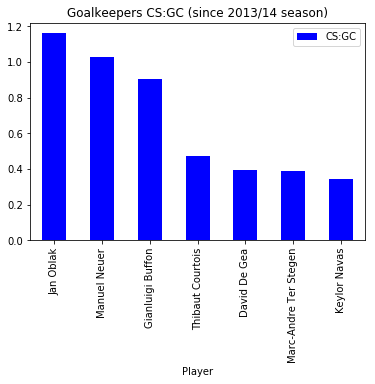

In [2]:
#ANALYSIS - since 2013/14 season (in line with the article)
goalkeeper1 = goalkeeper.groupby(goalkeeper.Player).sum()
goalkeeper1['CS:GC'] = goalkeeper1['Clean sheets'] / goalkeeper1['Goals conceded']
display(goalkeeper1.sort_values(by = ['Clean sheets', 'CS:GC'], ascending = False))

#Bar chart
bar_chart = goalkeeper1.reset_index().sort_values(by = 'CS:GC', ascending = False).plot.bar(x = 'Player', y = 'CS:GC', color = 'Blue', title = 'Goalkeepers CS:GC (since 2013/14 season)')
display(bar_chart)

## Analysis

Since 2013/14, Jan Oblak has kept an incredible 86 clean sheets and only conceded 74 goals. In the article, Jan Oblak was directly compared with only David De Gea and it was shown that Jan Oblak was statistically superior over this period of time. However, if the comparison is made with other top goalkeepers in the world, Jan Oblak's achievement can be put into context. 

David De Gea is actually outperformed by a number of goalkeepers during this period. Gianluigi Buffon tops the table in terms of clean sheets since the 2013/14 season after a number of successful seasons in Serie A with Juventus, beating Oblak by one. Oblak's total is arguably a more impressive given that he achieved his total in 17 less games (156 appearances compared to 139). Another surprising observation is that Oblak is not the only goalkeeper who boasts more clean sheets than goals conceded over this period. Manuel Neuer comes a close second with a clean sheets to goals conceded ratio of 1.03 compared to Oblak's 1.16. Given that they made a similar number of appearances over this period and Oblak kept 12 more clean sheets than Neuer, Oblak performances appear to be stastically superior.

Some may argue that Oblak's achievements could be inflated by his outstanding final season with Benfica, as mentioned in the article, where he kept 14 clean sheets in 16 games in an arguably weaker league than some of his rivals. We will investigate this claim further by analysing the top goalkeepers performances since Jan Oblak joined Atletico Madrid at the start of the 2014/15 season.

,Appearances,Clean sheets,Goals conceded,CS:GC
Player,,,,
Jan Oblak,123,72,71,1.014085
Gianluigi Buffon,123,67,76,0.881579
Manuel Neuer,102,59,54,1.092593
David De Gea,150,59,138,0.427536
Thibaut Courtois,131,51,126,0.404762
Marc-Andre Ter Stegen,87,37,76,0.486842
Keylor Navas,96,29,94,0.308511


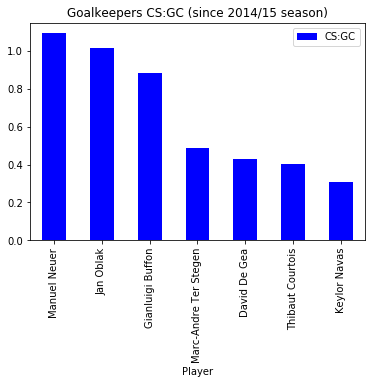

In [3]:
#ANALYSIS - since 2014/15 season (while Jan Oblak has been at Atletico)
goalkeeper2 = goalkeeper[goalkeeper.Season != "2013/14"]
goalkeeper3 = goalkeeper2.groupby(goalkeeper2.Player).sum()
goalkeeper3['CS:GC'] = goalkeeper3['Clean sheets'] / goalkeeper3['Goals conceded']
display(goalkeeper3.sort_values(by = ['Clean sheets', 'CS:GC'], ascending = False))

#BAR CHART
bar_chart1 = goalkeeper3.reset_index().sort_values(by = 'CS:GC', ascending = False).plot.bar(x = 'Player', y = 'CS:GC', color = 'Blue', title = 'Goalkeepers CS:GC (since 2014/15 season)')
display(bar_chart1)

(NOTE: Visualisation improvement - colour coded bars for each player matching between graphs) 

Since Jan Oblak has been at Atletico Madrid; Manuel Neuer, Gianluigi Buffon and himself are still statistically the top performing goalkeepers, appearing in the top 3 for total clean sheets and registering significantly superior clean sheets to goals conceded ratios than the others. The only keepers from the subjective 'top 7 in the world' to have kept more clean sheets than goals conceded in their respective leagues are Oblak and Neuer. 

This time, Oblak beats Buffon to the top clean sheet holder at 72 to 67. However, since the 2014/15 season, Manuel Neuer claims the title for best clean sheets to goals conceded ratio (1.09 to 1.04). This is surprising given recent high media coverage of the Oblak statistic, especially with a number of posts citing the statistic over this time period.

## Evaluation

The article praises the brilliant performances of Jan Oblak over recent seasons and correctly proves his statistical superiority over David De Gea but the deeper research conducted here suggests that it may be too early to definitively claim that Jan Oblak is the best goalkeeper in the world. 

To better distinguish who stakes the biggest claim to being the best goal keeper in the world, it is worth trying to eliminate the potential team or league biases. Jan Oblak's statistics are deflated when we remove his performances outside of the 'top 4 leagues' in Europe. De Gea and Courtois both perform relatively poorly in the clean sheet to goals conceded ratios. Could this be influenced by playing in the Premier League over these periods?

Further analysis that could be completed:
- Compare goals conceded per league and distribution of goals conceded within the league. We could use these results to scale our data by league.
- Expansion of the goalkeeper shortlist to remove any bias selection.
- Compare number of shots faced to assess the percentage of goals conceded per shots.
- Use of a more advanced metric such as xG/xGoT to assess the quality of these shots.
- Analyse metrics that quantify goalkeeper's abilities, other than shot stopping, such as distribution.

An example of an analysis into goalkeeper's performances using the xGoT metric can be found below:

https://www.skysports.com/football/news/11661/11212584/david-de-gea-premier-leagues-top-performing-goalkeeper-stats-reveal

This was conducted during the 2017/18 Premier League season. It would be interesting to see the results if this was expanded over more leagues and multiple seasons.